In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#import packages
import pandas as pd #for DataFrame
import numpy as np #array
import tensorflow as tf #ssim method, extracting image similiarity probability
import matplotlib.pyplot as plt #show image
import matplotlib.image as mpimg #decode image
import cv2 #resize image

In [ ]:
#read train set
train = pd.read_csv('/content/gdrive/MyDrive/NDSC/new_training_set.csv')
train

,Unnamed: 0,title_1,image_1,title_2,image_2,Label
0,0,Johnson’s ® Top to Toe Hair & Body Bath 500ml,fdff8b9b8229da091dd7d070aae05f81.jpg,Johnson's cottontouch top to toe hair & body b...,41e191742760932598c7bd201e5dad47.jpg,0
1,1,Sandal Humble,906cc44f0be72d4e767669b5b63e3a17.jpg,Sandal Humble Glass - Glanzton,7a556b836bfdd08ea592216440524a34.jpg,0
2,2,PROMO LIKUID LIKUIT LIQUIT BABY POD LIQUID SAL...,475c26635de18b9f93032400732ff336.jpg,Voporizer Liquit - Likuit - Likuid - Liquid Pr...,ace93bec689f3f1565800c500a8341fa.jpg,0
3,3,6 Pasang / Set Anting Tusuk Bentuk Lingkaran A...,e630997f6217555d6026547ad1c15f0b.jpg,Subei 6 Pasang / Set Anting Tusuk Boho Bohemia...,31abbc176b09f5bd1728cfc3ecbbfb9c.jpg,0
4,4,ROREC NATURAL SKIN CARE MASK ROREC SHEET MASK ...,a27d11700a7902febd039dc3a96f10f2.jpg,Rorec 86 Natural Skin Care Shert Mask All Variant,813ad9dd638c10f1765db9dde20c9e42.jpg,1
...,...,...,...,...,...,...
10176,10176,[Bayar Di Tempat]O.TWO.O Lipstick Matte 12 War...,08f5ba211a48e9b66bbf0d0105272efb.jpg,O.TWO.O Lipstick Matte 12 Warna (2 in 1),08f5ba211a48e9b66bbf0d0105272efb.jpg,1
10177,10177,Baso Aci JELETOT INTANS Gurih Khas Kota Garut,855daa89bf4f31cec0f40b144cdb283e.jpg,Baso Aci Instan Khas Garut Enak Gurih..,ffad7f79772f4e482f420591848cd69e.jpg,0
10178,10178,MINYAK KUTUS KUTUS ASLI BALI,9525365b5b15af5855abf9daf03da8b4.jpg,Minyak Kutus Kutus Tamba Waras 100ml,7098a9638b9ad66fb8a7912201ec3d82.jpg,1
10179,10179,[1KG 13PCS] ❤ MiniMamy ❤ Baju Jumper Pendek Ka...,a245f49fdc9a03655d98e6a22a89cb7d.jpg,[1KG 13PCS] ❤ Kiddikiddo❤ Baju Jumper Kaos Pen...,ea3e2af55a4ebcdb61bfb9f5da56d1bb.jpg,0


In [ ]:
#read test set
test = pd.read_csv('/content/gdrive/MyDrive/NDSC/new_test_sample.csv')
test.head()

,Unnamed: 0,title_1,image_1,title_2,image_2
0,0,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,83d1798fee1c90c2845204d9261169bb.jpg,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...,caba83a8a7f9def9c4d268b6c34da7f4.jpg
1,1,Damai fashion jakarta - long dress JUMBO wanit...,126868769ca4a4694d36d28960f9de8a.jpg,[VIP] kasih fashion jakarta - long dress JUMBO...,7fdfe855a7be9c87238757c43b712b81.jpg
2,2,My Baby Minyak Telon 145 ML,86aee3dc281911f5f9d50fea17b978f0.jpg,My Baby Minyak Telon Plus 145 Ml 4btl kemasan ...,0ec544d3d4169df76ae156e76c724f0c.jpg
3,3,Creative Waterborne Marker Very Fine Double - ...,40ef98354335cf4780937da703ed6d65.jpg,SOMETHINC BROW WIZ Retractable Eyebrow,9cf798e5f940429f14b4af0fd48992a4.jpg
4,4,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,c28512df97d0fc1d61fd30de966e01c3.jpg,TAS KARAKTER ANAK LUCU,a4c09a46d8b1adda43a2433d40bba583.jpg


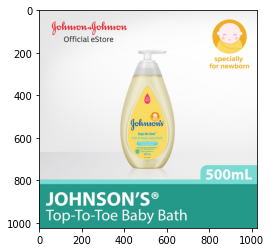

In [ ]:
#check data set
img = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/fdff8b9b8229da091dd7d070aae05f81.jpg')
plt.imshow(img)

(640, 640, 3)
AxesImage(54,36;334.8x217.44)


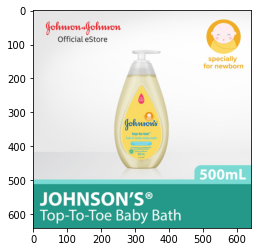

In [ ]:
#check image using opencv and resize
width = 640
height = 640
dim = (width, height)
im1 = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
print(im1.shape)
print(plt.imshow(im1))


In [ ]:
#compare image shape
print(im1.shape)
print(im2.shape)


(1024, 1024, 3)
(640, 640, 3)


**test image similiarity using ssim (structural image index measure)**

In [ ]:
   # Read images from file.
    im1 = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/a27d11700a7902febd039dc3a96f10f2.jpg')
    im2 = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/813ad9dd638c10f1765db9dde20c9e42.jpg')
    # Compute SSIM over tf.uint8 Tensors.
    ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    # Compute SSIM over tf.float32 Tensors.
    im1 = tf.image.convert_image_dtype(im1, tf.float32)
    im2 = tf.image.convert_image_dtype(im2, tf.float32)
    ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
    

In [ ]:
#print ssim
print(ssim1)
print(ssim2)

tf.Tensor(0.3250894, shape=(), dtype=float32)
tf.Tensor(0.3250894, shape=(), dtype=float32)


ssim1 and ssim2 both have type tf.float32 and are almost equal.

In [ ]:
#check another image
im1 = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/9525365b5b15af5855abf9daf03da8b4.jpg')
im2 = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/7098a9638b9ad66fb8a7912201ec3d82.jpg')

#check the shape
print(im1.shape)
print(im2.shape)

(640, 640, 3)
(640, 640, 3)


In [ ]:
    # Compute SSIM over tf.uint8 Tensors.
    ssim1 = tf.image.ssim(im1, im2, max_val=255, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

    # Compute SSIM over tf.float32 Tensors.
    im1 = tf.image.convert_image_dtype(im1, tf.float32)
    im2 = tf.image.convert_image_dtype(im2, tf.float32)
    ssim2 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

In [ ]:
print(ssim1)
print(ssim2)

tf.Tensor(0.81167537, shape=(), dtype=float32)
tf.Tensor(0.81167537, shape=(), dtype=float32)


ssim1 and ssim2 both have type tf.float32 and are almost equal.

AxesImage(54,36;334.8x217.44)


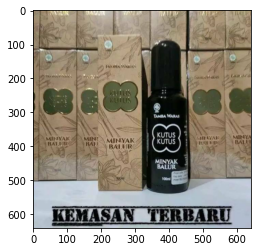

In [ ]:
print(plt.imshow(im1))

AxesImage(54,36;334.8x217.44)


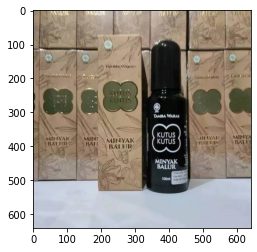

In [ ]:
print(plt.imshow(im2))

Nilai ssim dari kedua gambar sebesar **0.811**, nilai yang cukup tinggi.

Jika dilihat dari gambar, kedua gambarnya sama hanya berbeda terdapat tulisan pada gambar pertama.

Sehingga wajar jika nilai ssim-nya cukup tinggi.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10181 entries, 0 to 10180
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10181 non-null  int64 
 1   title_1     10181 non-null  object
 2   image_1     10181 non-null  object
 3   title_2     10179 non-null  object
 4   image_2     10181 non-null  object
 5   Label       10181 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 477.4+ KB


##Data Cleaning

In [ ]:
#cek gambar yang tidak RGB
i=0
p=0
for n in range(len(test)):
  p = p+1
  #read image
  img1 = mpimg.imread('/content/gdrive/MyDrive/NDSC/sample_img/{}'.format(test.image_1[n]))
  img2 = mpimg.imread('/content/gdrive/MyDrive/NDSC/sample_img/{}'.format(test.image_2[n]))
  
  if (img1.shape[2] !=3) | (img2.shape[2]!=3):
    j[i] = n
    i = i+1

In [ ]:
a = [321, 487, 1792, 1972, 2487, 2981, 3532, 3597, 4183, 4331, 4345, 4617, 
     4792, 4944, 5253, 5887, 5957, 6117, 6277, 6295, 6436, 6574, 7031, 7199, 
     7812, 8122, 8926
     ] # a merupakan baris yg gambarnya tidak rgb
train_1 = train.drop(a).reset_index().drop(['index','Unnamed: 0'], axis=1)
print(train.shape)
print(train_1.shape)

(10181, 6)
(10154, 5)


In [ ]:
#extract image similiarity measure
p=0

for n in range(p, len(train_1)):

  
  #read image
  img1 = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/{}'.format(train_1.image_1[n]))
  img2 = mpimg.imread('/content/gdrive/MyDrive/NDSC/training_img/{}'.format(train_1.image_2[n]))

  #check dimension
  #if row != column
  if (img1.shape[0]!=img1.shape[1])|(img2.shape[0]!=img2.shape[1]):
    if (img1.shape[0] == img2.shape[0]) & (img1.shape[1] == img2.shape[1]):
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                            filter_sigma=1.5, k1=0.01, k2=0.03)
    else:
      mini = min([img1.shape[0], img1.shape[1], img2.shape[0], img2.shape[1]])
      img1 = cv2.resize(img1, (mini, mini), interpolation=cv2.INTER_AREA)
      img2 = cv2.resize(img2, (mini, mini), interpolation=cv2.INTER_AREA)
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
  # If the dimension same
  elif (img1.shape[0] == img2.shape[0]):
    im1 = tf.image.convert_image_dtype(img1, tf.float32)
    im2 = tf.image.convert_image_dtype(img2, tf.float32)
    ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
   
  # If the dimension different  
  # Reduce resolution
  elif (img1.shape[0] > img2.shape[0]): 
      img1 = cv2.resize(img1, (img2.shape[0], img2.shape[0]), interpolation=cv2.INTER_AREA)
      img2 = cv2.resize(img2, (img2.shape[0], img2.shape[0]), interpolation=cv2.INTER_AREA)
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
  else:
      img1 = cv2.resize(img1, (img1.shape[0], img1.shape[0]), interpolation=cv2.INTER_AREA)
      img2 = cv2.resize(img2, (img1.shape[0], img1.shape[0]), interpolation=cv2.INTER_AREA)
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)

  #print(img1.shape)
  #print(img2.shape)
  p = p+1   
  k.append(ssim1.numpy())

In [ ]:
#print(p)
print(k)

10154
[0.5586605, 0.5341332, 0.13806178, 0.3411474, 0.3250894, 0.33236983, 0.40761313, 0.55144936, 0.4641539, 0.92764926, 0.5043678, 0.4733213, 0.35720357, 0.3023718, 0.23322536, 0.9855663, 0.492112, 0.8475043, 0.41047904, 0.2579448, 0.18288012, 0.20612215, 0.97451574, 0.49963412, 1.0, 0.9352546, 0.2949346, 0.4188966, 0.9653253, 0.65728456, 0.3486384, 0.5540059, 0.9101756, 0.4867349, 0.896972, 0.92638475, 0.89044863, 0.47556487, 0.3400209, 0.44049218, 0.9491671, 0.23328207, 0.37798354, 0.44777116, 0.7672661, 0.18134527, 0.973375, 0.33699933, 0.33957234, 0.16722663, 0.52573043, 0.4126595, 0.31485865, 0.79170924, 0.35900554, 0.73382264, 0.18983416, 0.4382302, 0.42401758, 0.9358528, 0.92589086, 0.53678775, 0.22043975, 0.38922393, 0.92931914, 0.4767098, 0.40607595, 1.0, 0.9379344, 0.20117514, 0.54849225, 0.43045238, 0.3032914, 0.52819735, 0.4311502, 0.6860663, 0.19878154, 0.63157845, 0.9245446, 0.9421194, 0.43744397, 0.9426155, 0.10744723, 0.21950851, 0.96317005, 0.9816769, 0.90045923, 0.5

In [ ]:
#buat kolom baru 'image similiarity measure'
train_1['img_prob'] = k

In [ ]:
train_1.tail()

,title_1,image_1,title_2,image_2,Label,img_prob
10149,[Bayar Di Tempat]O.TWO.O Lipstick Matte 12 War...,08f5ba211a48e9b66bbf0d0105272efb.jpg,O.TWO.O Lipstick Matte 12 Warna (2 in 1),08f5ba211a48e9b66bbf0d0105272efb.jpg,1,1.000000
10150,Baso Aci JELETOT INTANS Gurih Khas Kota Garut,855daa89bf4f31cec0f40b144cdb283e.jpg,Baso Aci Instan Khas Garut Enak Gurih..,ffad7f79772f4e482f420591848cd69e.jpg,0,0.370679
10151,MINYAK KUTUS KUTUS ASLI BALI,9525365b5b15af5855abf9daf03da8b4.jpg,Minyak Kutus Kutus Tamba Waras 100ml,7098a9638b9ad66fb8a7912201ec3d82.jpg,1,0.811675
10152,[1KG 13PCS] ❤ MiniMamy ❤ Baju Jumper Pendek Ka...,a245f49fdc9a03655d98e6a22a89cb7d.jpg,[1KG 13PCS] ❤ Kiddikiddo❤ Baju Jumper Kaos Pen...,ea3e2af55a4ebcdb61bfb9f5da56d1bb.jpg,0,0.290499
10153,SOMEBYMI Snail True Cica Miracle Repair Serum ...,b53a42dc8c7642798a55f1f48834933f.jpg,SOME BY MI Snail True Cica Miracle Repair Seru...,1161b1cb24f4f160a087c977dbf4a013.jpg,1,0.975482


In [ ]:
train_1.to_csv('image_prob.csv', index=False)

In [ ]:
test.head()

,Unnamed: 0,title_1,image_1,title_2,image_2
0,0,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,83d1798fee1c90c2845204d9261169bb.jpg,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...,caba83a8a7f9def9c4d268b6c34da7f4.jpg
1,1,Damai fashion jakarta - long dress JUMBO wanit...,126868769ca4a4694d36d28960f9de8a.jpg,[VIP] kasih fashion jakarta - long dress JUMBO...,7fdfe855a7be9c87238757c43b712b81.jpg
2,2,My Baby Minyak Telon 145 ML,86aee3dc281911f5f9d50fea17b978f0.jpg,My Baby Minyak Telon Plus 145 Ml 4btl kemasan ...,0ec544d3d4169df76ae156e76c724f0c.jpg
3,3,Creative Waterborne Marker Very Fine Double - ...,40ef98354335cf4780937da703ed6d65.jpg,SOMETHINC BROW WIZ Retractable Eyebrow,9cf798e5f940429f14b4af0fd48992a4.jpg
4,4,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,c28512df97d0fc1d61fd30de966e01c3.jpg,TAS KARAKTER ANAK LUCU,a4c09a46d8b1adda43a2433d40bba583.jpg


In [ ]:
#extract image similiarity measure for test set
p=0
q=[]
for n in range(p, len(test)):
  
  #read image
  img1 = mpimg.imread('/content/gdrive/MyDrive/NDSC/sample_img/{}'.format(test.image_1[n]))
  img2 = mpimg.imread('/content/gdrive/MyDrive/NDSC/sample_img/{}'.format(test.image_2[n]))

  #check dimension
  #if row != column
  if (img1.shape[0]!=img1.shape[1])|(img2.shape[0]!=img2.shape[1]):
    if (img1.shape[0] == img2.shape[0]) & (img1.shape[1] == img2.shape[1]):
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                            filter_sigma=1.5, k1=0.01, k2=0.03)
    else:
      mini = min([img1.shape[0], img1.shape[1], img2.shape[0], img2.shape[1]])
      img1 = cv2.resize(img1, (mini, mini), interpolation=cv2.INTER_AREA)
      img2 = cv2.resize(img2, (mini, mini), interpolation=cv2.INTER_AREA)
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
  # If the dimension same
  elif (img1.shape[0] == img2.shape[0]):
    im1 = tf.image.convert_image_dtype(img1, tf.float32)
    im2 = tf.image.convert_image_dtype(img2, tf.float32)
    ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
   
  # If the dimension different  
  # Reduce resolution
  elif (img1.shape[0] > img2.shape[0]): 
      img1 = cv2.resize(img1, (img2.shape[0], img2.shape[0]), interpolation=cv2.INTER_AREA)
      img2 = cv2.resize(img2, (img2.shape[0], img2.shape[0]), interpolation=cv2.INTER_AREA)
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)
  else:
      img1 = cv2.resize(img1, (img1.shape[0], img1.shape[0]), interpolation=cv2.INTER_AREA)
      img2 = cv2.resize(img2, (img1.shape[0], img1.shape[0]), interpolation=cv2.INTER_AREA)
      im1 = tf.image.convert_image_dtype(img1, tf.float32)
      im2 = tf.image.convert_image_dtype(img2, tf.float32)
      ssim1 = tf.image.ssim(im1, im2, max_val=1.0, filter_size=11,
                          filter_sigma=1.5, k1=0.01, k2=0.03)


  p = p+1   
  q.append(ssim1.numpy())

In [ ]:
print(p)
print(q)

207
[0.3885251, 0.20754279, 0.7034442, 0.20135348, 0.264296, 0.4320774, 0.55962557, 0.50879514, 0.45871952, 0.7363438, 0.9101336, 0.24398862, 0.6247704, 0.26096705, 0.68148214, 0.779037, 0.6146635, 0.8591005, 0.54453725, 0.14605528, 0.3468864, 0.29506454, 0.8363838, 1.0, 0.59600407, 0.5054838, 0.9711047, 1.0, 0.18262573, 0.88447577, 0.93392897, 0.32132664, 0.19580775, 0.5843616, 0.44456545, 1.0, 0.57388765, 0.998024, 0.7160242, 0.38027704, 0.96926194, 0.5172479, 0.39968482, 0.4304155, 0.6644115, 0.1284449, 0.7352511, 0.25492394, 0.48215476, 0.41352975, 0.9572279, 0.22908156, 0.59093267, 0.9171479, 0.91750675, 0.2744193, 0.45909646, 0.2623496, 1.0, 0.63000137, 0.17371766, 0.33518553, 0.31501457, 0.9999972, 0.9738253, 0.46385512, 0.3595722, 0.12014106, 1.0, 0.1992838, 0.5722657, 0.5652743, 0.5189044, 0.2805634, 0.48132238, 0.5998325, 0.60575086, 0.4149519, 0.40256512, 0.5793737, 0.31058154, 1.0, 0.4118627, 0.92728966, 0.65339035, 0.9576385, 0.90200424, 0.75350314, 0.6261944, 0.68362767, 

In [ ]:
#buat kolom baru 'image similiarity measure'
test['img_prob'] = q

In [ ]:
test.to_csv('test_img_prob.csv', index=False)

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/NDSC/new_test_sample.csv')
test.head()

,Unnamed: 0,title_1,image_1,title_2,image_2
0,0,12.12 SUPER PROMO !! Sandal Jepit Pantai Fashion,83d1798fee1c90c2845204d9261169bb.jpg,Clarisse CRAZY OFFER Beli 5 Dapet 12 POLKA SUM...,caba83a8a7f9def9c4d268b6c34da7f4.jpg
1,1,Damai fashion jakarta - long dress JUMBO wanit...,126868769ca4a4694d36d28960f9de8a.jpg,[VIP] kasih fashion jakarta - long dress JUMBO...,7fdfe855a7be9c87238757c43b712b81.jpg
2,2,My Baby Minyak Telon 145 ML,86aee3dc281911f5f9d50fea17b978f0.jpg,My Baby Minyak Telon Plus 145 Ml 4btl kemasan ...,0ec544d3d4169df76ae156e76c724f0c.jpg
3,3,Creative Waterborne Marker Very Fine Double - ...,40ef98354335cf4780937da703ed6d65.jpg,SOMETHINC BROW WIZ Retractable Eyebrow,9cf798e5f940429f14b4af0fd48992a4.jpg
4,4,Goblin♛ COD Tas Ransel Anak Sekolah Karakter K...,c28512df97d0fc1d61fd30de966e01c3.jpg,TAS KARAKTER ANAK LUCU,a4c09a46d8b1adda43a2433d40bba583.jpg


In [ ]:
len(test)

207

In [ ]:
train_2 = train_1.reset_index().drop(['index', 'Unnamed: 0'], axis=1)
train_2.tail()

,title_1,image_1,title_2,image_2,Label
10149,[Bayar Di Tempat]O.TWO.O Lipstick Matte 12 War...,08f5ba211a48e9b66bbf0d0105272efb.jpg,O.TWO.O Lipstick Matte 12 Warna (2 in 1),08f5ba211a48e9b66bbf0d0105272efb.jpg,1
10150,Baso Aci JELETOT INTANS Gurih Khas Kota Garut,855daa89bf4f31cec0f40b144cdb283e.jpg,Baso Aci Instan Khas Garut Enak Gurih..,ffad7f79772f4e482f420591848cd69e.jpg,0
10151,MINYAK KUTUS KUTUS ASLI BALI,9525365b5b15af5855abf9daf03da8b4.jpg,Minyak Kutus Kutus Tamba Waras 100ml,7098a9638b9ad66fb8a7912201ec3d82.jpg,1
10152,[1KG 13PCS] ❤ MiniMamy ❤ Baju Jumper Pendek Ka...,a245f49fdc9a03655d98e6a22a89cb7d.jpg,[1KG 13PCS] ❤ Kiddikiddo❤ Baju Jumper Kaos Pen...,ea3e2af55a4ebcdb61bfb9f5da56d1bb.jpg,0
10153,SOMEBYMI Snail True Cica Miracle Repair Serum ...,b53a42dc8c7642798a55f1f48834933f.jpg,SOME BY MI Snail True Cica Miracle Repair Seru...,1161b1cb24f4f160a087c977dbf4a013.jpg,1
